
## <span style='color:#e91e63'>LAB 12 \(Due Wed, April 30 by 11:59pm\). </span>

<span style='color:#e91e63'>For each exercise, answer in the cell below each exercise. Make sure to transfer your answers to Gradescope for your final submission! Please note that some exercises require code while some just require an English answer to a code\-related question. If so, begin the cell with \#.</span>

<span style='color:#e91e63'><u>Submitting:</u></span><span style='color:#e91e63'> You can keep scratch work in this notebook, but you will submit all your final responses on the assignment linked from D2L, which routes you to Gradescope for your submission. </span>


#### <span style='color:#3f51b5'>Question 0 \(Preamble Code\)</span>

**Question 0:** Run the code in the box below.  This box defines a function that we will use later to make bifurcation diagrams.  You will need to run this box <u>each time</u> you start up this assignment, or each time that the timer on the free version of cocalc runs out.  If you get any confusing errors, it might be helpful to try re-running this code.




In [4]:
def find_zeros_1D(f, x_range):
    x, xmin, xmax = x_range
    roots = [x0.rhs().n() for x0 in solve(f, x)]
    roots = [real(x0) for x0 in roots if abs(imag(x0)) < 1E-12]
    return [x0 for x0 in roots if xmin <= x0 <= xmax]

def plot_bifurcation_diagram(f, param_range, var_range, **options):
    parameter, param_min, param_max = param_range
    variable, var_min, var_max = var_range
    stable_style = {"color": "blue", "linewidth": 3}
    unstable_style = {"color": "red", "linewidth": 3}
    bifpoints_style = {"color": "orange", "size": 50}
    options.setdefault("frame", False)
    options.setdefault("axes", True)
    options.setdefault("axes_labels", ("${}$".format(parameter), "${}$".format(variable)))
    df = diff(f, variable)

    # An eq point is stable if df/dx < 0
    stable_style.update(options)
    p = implicit_plot(f, param_range, var_range, region=-df, **stable_style)

    # An eq point is unstable if df/dx > 0
    unstable_style.update(options)
    p += implicit_plot(f, param_range, var_range, region=df, **unstable_style)

    if bifpoints_style:
        bifpoints = [(r.rhs().n(), x.rhs().n()) for r, x in solve((f, df), (parameter, variable))]
        for param_value, var_value in bifpoints:
            if not (param_value in RR and param_min <= param_value <= param_max and
                    var_value in RR and var_min <= var_value <= var_max):
                continue
            p += point((param_value, var_value), **bifpoints_style)
    return p

#### <span style='font-family:Arial'><span style='color:#3f51b5'>**Questions 1.1-1.7 (The Lac Operon)**</span></span>



E. coli is a bacterium that naturally occurs in the stomach that and it is a great example of a biological switch.  E. coli uses lactose for energy. Lactose can diffuse into the cell, but having a channel specifically designed to lead extracellular lactose into the cell would make the process much faster.  The protein *lactose permease* creates a channel to import lactose into the cell.  However, channel proteins like this take a lot of resources to build.  Therefore, E. coli will only build the channels when there is plenty of extracellular lactose around (this is the bacterium "switching on" production).  The assumptions we will make for this model are:

- Let $X$ be the lactose concentration in the E. coli cell.  
- Lactose in the cell is metabolized (outflow) at a per-mass (or per capita) rate $r$.
- The rate of import (inflow) of lactose is equal to the production rate of lactose permease.  The production rate of lactose permease is low when $X$ is low, and higher when $X$ is high.
- The cell can only produce so much lactose permease at a time.  So the import rate of lactose only increases up to some maximum, then levels off.  We will use the following *sigmoid function*   to model the lactose import rate: $f(X) = 0.01+ \dfrac{X^2}{1+X^2}$.

**Question 1.1:** Fill in the formulas for the import rate (**inflow**) and metabolization rate (**<span style="color:orange">outflow</span>**) from the information given above.  You will upload a screenshot on Gradescope that shows your name, code, and output cell.








In [0]:
r=0.4 ##for this example only, this fixes the value of r so that we can see both graphs.
var('X')  ## Defining X as our state variable.
import_rate(X) = *** ##Fill in the import rate here.
metab_rate(X) =  *** ##Fill in the metabolization rate here.
p = plot(import_rate(X), (X, 0, 5), color="black", legend_label="Import")
p += plot(metab_rate, (X, 0, 5), color="orange", legend_label="Metabolism")
p.show(ymin=0, ymax=1.5, aspect_ratio=2, figsize=7, frame=True, axes_labels=("$X$ (lactose concentration)", "Input/output rates"))

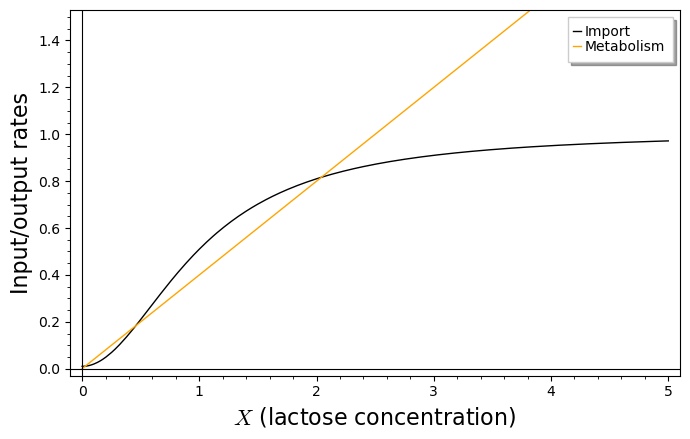

In [3]:
#Copy and paste, then modify here.
r=0.4 ##for this example only, this fixes the value of r so that we can see both graphs.
var('X')  ## Defining X as our state variable.
import_rate(X) = 0.01+X^2/(1+X^2) ##Fill in the import rate here.
metab_rate(X) =  r*X ##Fill in the metabolization rate here.
p = plot(import_rate(X), (X, 0, 5), color="black", legend_label="Import")
p += plot(metab_rate, (X, 0, 5), color="orange", legend_label="Metabolism")
p.show(ymin=0, ymax=1.5, aspect_ratio=2, figsize=7, frame=True, axes_labels=("$X$ (lactose concentration)", "Input/output rates"))

For questions 1.2, 1.3, and 1.4 we will use the single cell of code below.

**Question 1.2:**  Run the code below question 1.4 to implement a slider for $r$.  As you move the slider, what aspect of the graph of the outflow is changing?

**Question 1.3:** If we want to find the equilibria of the system, then we need to know when $X'=0$.  Since we have graphed the two components of the $X'$ equation on the same graphic, what must be the relationship between the inflow and the outflow?  _See Gradescope for options._

**Question 1.4:**  One way we could quickly classify the stability of each equilibrium point is called the "over-under method".  Since the black curve represents inflow and the orange line represents outflow, we can quickly find the sign of $X'$ if we know which component is larger.  If inflow is "over" (i.e. larger) and outflow is "under" (i.e. smaller), then what is the sign of $X'$?  What does this say about the direction our change vector should point?  What about if inflow was "under" and outflow was "over"?


In [2]:
##Run this cell to get the graphs that will help you answer questions 1.2, 1.3, and 1.4
@interact
def lactose_equilibria(r=slider(0.15, 0.8, 0.01, label="r (Metabolization rate)", default=0.4)):
    import_rate(X) = 0.01 + X^2 / (1 + X^2)
    metab_rate(X) = r*X
    p = plot(import_rate(X), (X, 0, 5), color="black", legend_label="Import rate")
    p += plot(metab_rate(X), (X, 0, 5), color="orange", legend_label="Metabolism rate")
    
    p.show(ymin=0, ymax=1.5, aspect_ratio=2, figsize=10, frame=True, axes_labels=("$X$ (lactose concentration)", "Input/output rates"))

Interactive function <function lactose_equilibria at 0x7fd7ca5158a0> with 1 widget
  r: TransformFloatSlider(v…

In [0]:
#1.2: r changes the slope of the outflow
#1.3: inflow=outflow, the orange graph should be at the same height at the black graph at these X-values.
#1.4: If inflow is over, then X'>0 and points right.  If inflow is under, X'<0 and points left.

**Question 1.5:**  Run the given code below.  There are two check boxes above the graphic.  Checking one will make dots on the **horizontal axis** of the plot showing which values of $X$ correspond to equilibrium values, and checking the other box will give you the stability of those equilibria (blue for stable, red for unstable).  There is also a slider for $r$.  As $r$ increases, at what value of $r$ do we suddenly switch from having 3 equilibria to having 1?  Give the smallest value of $r$ that corresponds to one equilibrium as $r$ increases.


In [6]:
@interact
def lactose_equilibria(r=slider(0.15, 0.8, 0.01, label="r (Metabolization rate)", default=0.4),
                        show_eqpts=checkbox(default=False, label="Show equilibrium points"), 
                        show_stability=checkbox(default=False, label="Include stability")):
    import_rate(X) = 0.01 + X^2 / (1 + X^2)
    metab_rate(X) = r*X
    p = plot(import_rate(X), (X, 0, 5), color="black", legend_label="Import rate")
    p += plot(metab_rate(X), (X, 0, 5), color="orange", legend_label="Metabolism rate")
    if show_eqpts:
        vectorfield(X) = import_rate(X) - metab_rate(X)
        vf_deriv(X) = diff(vectorfield(X), X)
        eqpts = find_zeros_1D(vectorfield, (X, 0, 5))
        for eqpt in eqpts:
            stability = vf_deriv(eqpt)
            if not show_stability:
                color = "purple"
            elif stability < 0:
                color = "blue"
            elif stability > 0:
                color = "red"
            else:
                color = "orange"
            p += point((eqpt, 0), color=color, size=80)
    p.show(ymin=0, ymax=1.5, aspect_ratio=2, figsize=6, frame=True, axes_labels=("$X$ (lactose concentration)", "Input/output rates"))

Interactive function <function lactose_equilibria at 0x7f88f91e6980> with 3 widgets
  r: TransformFloatSlider(…

In [0]:
#1.5: r=0.52

**Question 1.6:**  Run the given code below.  This will plot a similar graph of the components of $X'$ on the left and you will build a bifurcation diagram on the right.  As you change the value of the parameter $r$, Cocalc will take a snapshot of where your equilibrium points are and then plot them on a vertical line on the graph on the right.  So each specific value of $r$ corresponds to a vertical slice of the bifurcation diagram, that represents a phase portrait of the model for that $r$ value.  Make sure to use the slider in all the values so that you make a full picture of the bifurcation diagram on the right.  You will upload a screenshot on Gradescope that shows your name and output cell.

_Hint:_ you can test any values of $r$ by (after running the code) clicking the box with a number inside it (just to the right of the slider) and typing the value of $r$ you want to try.


In [7]:
xmin = 0
xmax = 3.1
lac_bif_diagram = point(((0.25, xmin), (0.8, xmax)), size=0, aspect_ratio=0.12, axes_labels=("r", "X"))

@interact
def lac_bifurc_diagram(r=slider(0.3, 0.8, 0.05, label="r (Metabolization rate)", default=0.3)):
    global lac_bif_diagram
    import_rate(X) = 0.01 + X^2 / (1 + X^2)
    metab_rate(X) = r*X
    vectorfield(X) = import_rate(X) - metab_rate(X)
    vf_deriv(X) = diff(vectorfield(X), X)
    p = plot(import_rate(X), (X, xmin, xmax), color="black", legend_label="Import rate", 
             ymin=0, ymax=1.5, aspect_ratio=1.4, axes_labels=("$X$        ", "Input/output rates"))
    p += plot(metab_rate(X), (X, xmin, xmax), color="orange", legend_label="Metabolism rate")
    lac_bif_diagram += line(((r, xmin), (r, xmax)), color="lightgray", linestyle="dashed", thickness=1)
    eqpts = find_zeros_1D(vectorfield, (X, xmin, xmax))
    for eqpt in eqpts:
        stability = vf_deriv(eqpt)
        if stability < 0:
            color = "blue"
            legend_label="Stable"
        elif stability > 0:
            color = "red"
            legend_label="Unstable"
        else:
            color = "orange"
        p += point((eqpt, 0), color=color, size=50)
        lac_bif_diagram += point((r, eqpt), color=color, size=50)
    both = graphics_array([[p, lac_bif_diagram]])
    both.show(figsize=11)

Interactive function <function lac_bifurc_diagram at 0x7f88f96d8c20> with 1 widget
  r: TransformFloatSlider(v…

**Question 1.7:**  If we wanted a more continuous graph of our bifurcation diagram, then we just need to use a smaller step size for $r$.  Running the code below will plot the complete bifurcation diagram for this model.  Based on the image it displays, what kind of bifurcation do you see happening in this system?

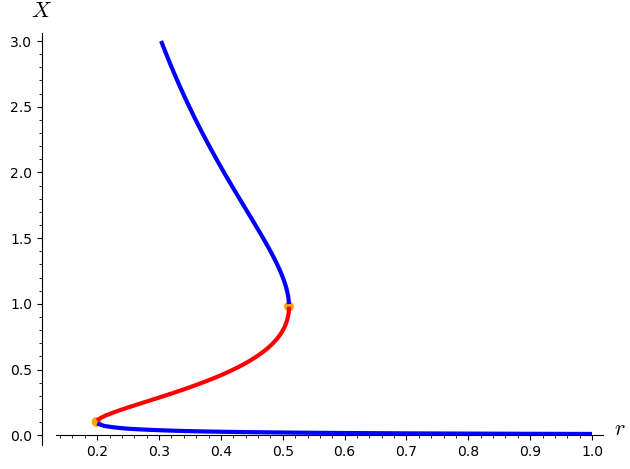

In [8]:
r, X = var("r, X")
p = plot_bifurcation_diagram(0.01 + X^2 / (1 + X^2) - r*X, (r, 0.15, 1), (X, -0.01, 3))
p.show(aspect_ratio="auto")

In [0]:
#1.7: saddle node bifurcation

#### <span style='font-family:Arial'><span style='color:#3f51b5'>**Question 2.1-2.4 (Spruce Budworm Model)**</span></span>



Spruce budworms (genus *Choristoneura*) are insects that feed on coniferous trees, such as spruce trees. Their population has a curious behavior: most of the time, the population remains at relatively low, manageable levels. (We will refer to this as the population being in **refuge**.) But sometimes, as a result of particularly good conditions in their environment (i.e., high carrying capacity), there is a sudden and massive growth in the spruce budworm population. (We will refer to this as a population **outbreak**.) The curious part is that, after such an outbreak, even after the environment returns to normal (i.e., after the carrying capacity drops back to its previous level), the spruce budworm population remains high! That is, it remains in outbreak.

Scientists have found that what keeps the population in refuge under normal conditions is that they are preyed upon by birds, most notably the Cape May warbler (*Setophaga tigrina*).

We will model the spruce budworm population using the following assumptions:

- Let $N$ be the spruce budworm population.
- In the absence of predation by birds, the population grows logistically, with a natural per-capita growth rate $r$, and a carrying capacity of $k$.
- The warbler population remains constant , as they have other food sources.  
- The rate of predation by the warblers increases with the budworm population up to a certain level. The warblers can only eat so many worms. We will use the sigmoid function to model this predation: $predation(N) = \dfrac{N^2}{1+N^2}$.

Therefore the resulting differential equation is $$N' = r \cdot N \cdot \left( 1- \dfrac{N}{k}\right) - \dfrac{N^2}{1+N^2}$$  In everything below, we will assume that $r$ is constant and we will only vary $k$.  Specifically, we will assume $r=0.55$.





**Question 2.1:**  One equilibrium value is of course $N=0$.  The code below helps us find the remaining equilibrium points where we could use the over-under method to classify them.  Try varying the slider for $k$ to see how the equilibria change.  **There will be a region of values where four equilibria show up.  The question below focuses on this region of values.**

Find a value of $k$ that makes the middle unstable equilibrium (red) closer to the smallest stable equilibrium (blue).  Make sure you are using a value of $r=0.55$, and that you have selected the check box to show the equilibria.  Upload a screenshot that shows your name and the Cocalc graph, including the sliders that show your values of $r$ and $k$ that illustrate the above scenario.  Note that there are multiple values of $k$ that would work for this question.


In [9]:
@interact
def spruce_budworm_equilibria(
            r=slider(0.3, 0.8, 0.01, label="r (growth rate)", default=0.55), 
            k=slider(0.1, 15, 0.1, label="k (carrying capacity)", default=3), 
            show_eqpts=checkbox(default=False, label="Show equilibrium points")):
    percap_growthrate(N) = r*(1 - N/k)
    percap_predationrate(N) = N/(1 + N^2)
    p = plot(percap_growthrate(N), (N, 0, 15), color="black", legend_label="Growth rate")
    p += plot(percap_predationrate(N), (N, 0, 15), color="orange", legend_label="Predation rate")
    if show_eqpts:
        vectorfield(N) = N*(percap_growthrate(N) - percap_predationrate(N))
        vf_deriv(N) = diff(vectorfield(N), N)
        eqpts = find_zeros_1D(vectorfield, (N, -0.01, 15))
        for eqpt in eqpts:
            stability = vf_deriv(eqpt)
            if stability < 0:
                color = "blue"
            elif stability > 0:
                color = "red"
            else:
                color = "orange"
            p += point((eqpt, 0), color=color, size=50)
    p.show(xmax=15, ymin=0, ymax=0.7, aspect_ratio=10, figsize=10,frame=True, 
           axes_labels=("$N$ (Population)", "(per capita) growth/\npredation rates"))

Interactive function <function spruce_budworm_equilibria at 0x7f88f4be94e0> with 3 widgets
  r: TransformFloat…

In [0]:
#2.1: The k value has to be between 7 <= k <= 11.5

**Question 2.2:** As we did in the Lac Operon example, we will construct the bifurcation diagram by drawing vertical phase portraits of our model for specific values of $k$.  Notice that we include $N=0$ as an equilibrium for each value of $k$ that we pick, and the remaining equilibria come from the intersection points on the left graph.   Make sure to run the slider through all the values to build the full bifurcation diagram on the right.  Upload a screenshot showing your name and both graphics, with the bifurcation diagram including all vertical slices possible.

In [1]:
nmin = -0.01
nmax = 12
sbw_bif_diagram = point(((0, nmin), (14, nmax)), size=0, aspect_ratio=1, axes_labels=("k", "N"))

@interact
def sbw_bifurc_diagram(k=slider(1, 14, 0.5, label="k (carrying capacity)", default=1)):
    global sbw_bif_diagram
    r = 0.55
    percap_growthrate(N) = r*(1 - N/k)
    percap_predationrate(N) = N/(1 + N^2)
    vectorfield(N) = N*(percap_growthrate(N) - percap_predationrate(N))
    vf_deriv(N) = diff(vectorfield(N), N)
    p = plot(percap_growthrate(N), (N, nmin, nmax), color="black", legend_label="Growth rate", ymin=0, ymax=0.7, 
             aspect_ratio=14, axes_labels=("N       ", "(per capita) growth/\npredation rates"))
    p += plot(percap_predationrate(N), (N, nmin, nmax), color="orange", legend_label="Predation rate")
    sbw_bif_diagram += line(((k, nmin), (k, nmax)), color="lightgray", linestyle="dashed", thickness=1)
    eqpts = find_zeros_1D(vectorfield, (N, nmin, nmax))
    for eqpt in eqpts:
        stability = vf_deriv(eqpt)
        if stability < 0:
            color = "blue"
        elif stability > 0:
            color = "red"
        else:
            color = "orange"
        p += point((eqpt, 0), color=color, size=50)
        sbw_bif_diagram += point((k, eqpt), color=color, size=50)
    both = graphics_array([[p, sbw_bif_diagram]])
    both.show(figsize=11)

Interactive function <function sbw_bifurc_diagram at 0x7fd81b7147c0> with 1 widget
  k: TransformFloatSlider(v…

**Question 2.3:**  Run the code below to plot the continuous bifurcation diagram for this model.  How many bifurcations occur in this model?  What type of bifurcations are they?  Note that $k>0$, so $k=0$ is not a bifurcation point.  

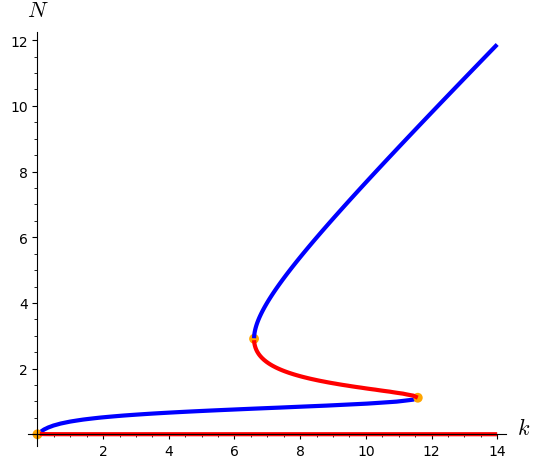

In [11]:
r = 0.55
k, N = var("k, N")
p = plot_bifurcation_diagram(r*N*(1 - N/k) - N^2 / (1 + N^2), (k, 0, 14), (N, -0.1, 12), plot_points=200)
p.show(xmin=0, aspect_ratio=1)

In [0]:
#2.3: there are 2 saddle node bifucations (at roughly k=6.5 and k=11.5)

**Question 2.4:**  Based on this diagram, when $k=9$, how many equilibria are there?

In [0]:
#2.4: 4 equilibria: 2 stable and 2 unstable

#### <span style='color:#3f51b5'>Questions 3\-4: Review & Reflection \(see Gradescope\)</span>

